In [6]:

 #  Lab Assignment-3

# Name : M Sai Ranga Rama Pavan Kumar Raju
# Reg No: 22BCE3821
# Slot: L34+35
# Faculty: SUBRAMANIYASWAMY V


# Objective: To Implement and Evaluate Classification Algorithms (Decision Tree and Naïve Bayes)
# 1. Implement and Evaluate Classification Algorithms:
#Dataset: Use the dataset (available from Kaggle or UCI Machine Learning Repository). Consider external dataset containing real-world data (e.g., customer churn prediction, medical diagnosis, or credit risk classification). The dataset includes both categorical and numerical attributes.
#Load and preprocess the dataset.
#Split the dataset into training and testing sets (80% training, 20% testing).
#Implement the following classification algorithms:
#1) ID3 Decision Tree: Implement the Iterative Dichotomiser 3 (ID3) algorithm using an existing Python library or from scratch if desired.
#2) CART Decision Tree: Implement the Classification and Regression Tree (CART) algorithm, which uses the Gini Index for splitting.
#3) Naïve Bayes Classifier: Implement the Gaussian Naïve Bayes or Multinomial Naïve Bayes based on the dataset's characteristics.
#Evaluate Model Performance:
#Compute accuracy, precision, recall, F1-score, and confusion matrix for each classifier.
#1)  Visualize the decision trees (ID3 and CART) to analyze how the models make decisions.
#2) Use ROC-AUC curves to compare classifier performance.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv("Churn_Modelling.csv")
print(df.head())
print(df.info())


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender   Age  \
0          1    15634602  Hargrave          619    France  Female  42.0   
1          2    15647311      Hill          608     Spain  Female  41.0   
2          3    15619304      Onio          502    France  Female  42.0   
3          4    15701354      Boni          699    France  Female  39.0   
4          5    15737888  Mitchell          850     Spain  Female  43.0   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1        1.0             1.0   
1       1   83807.86              1        0.0             1.0   
2       8  159660.80              3        1.0             0.0   
3       1       0.00              2        0.0             0.0   
4       2  125510.82              1        NaN             1.0   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4      

In [3]:
X = df.drop(columns=['Exited']) 
y = df['Exited']  

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (8001, 13)
Testing set size: (2001, 13)


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df = pd.read_csv('churn_Modelling.csv')


df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df.fillna(df.select_dtypes(include=['number']).mean(), inplace=True)
label_encoders = {}
for col in ['Geography', 'Gender']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le
X = df.drop(columns=['Exited'])
y = df['Exited']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ID3 Decision Tree
id3_tree = DecisionTreeClassifier(criterion='entropy', random_state=42)
id3_tree.fit(X_train, y_train)
y_pred_id3 = id3_tree.predict(X_test)

# Evaluate model
print("ID3 Decision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_id3))
print("Classification Report:\n", classification_report(y_test, y_pred_id3))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_id3))



ID3 Decision Tree:
Accuracy: 0.783608195902049
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86      1599
           1       0.47      0.52      0.49       402

    accuracy                           0.78      2001
   macro avg       0.67      0.68      0.68      2001
weighted avg       0.79      0.78      0.79      2001

Confusion Matrix:
 [[1359  240]
 [ 193  209]]


In [9]:
import pandas as pd
import numpy as np

df = pd.read_csv('churn_Modelling.csv')
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df.fillna(df.select_dtypes(include=['number']).mean(numeric_only=True), inplace=True)
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = df[col].astype('category').cat.codes  # Convert categorical data into numerical codes
print(df.head())
df.to_csv('processed_churn.csv', index=False)


   CreditScore  Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0          619          0       0  42.0       2       0.00              1   
1          608          2       0  41.0       1   83807.86              1   
2          502          0       0  42.0       8  159660.80              3   
3          699          0       0  39.0       1       0.00              2   
4          850          2       0  43.0       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0   1.000000             1.0        101348.88       1  
1   0.000000             1.0        112542.58       0  
2   1.000000             0.0        113931.57       1  
3   0.000000             0.0         93826.63       0  
4   0.705529             1.0         79084.10       0  


In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.7916


In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

text_data = ["I love programming", "Python is great", "Spam message here", "Machine learning is amazing"]
labels = [1, 1, 0, 1] 
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(text_data)
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, random_state=42)
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Multinomial Naïve Bayes Accuracy: {accuracy:.4f}")


Multinomial Naïve Bayes Accuracy: 1.0000



Gaussian Naïve Bayes Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


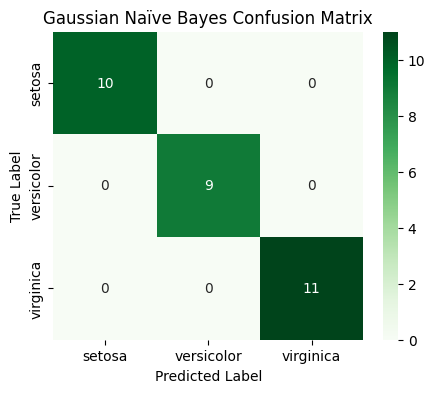

In [3]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.datasets import load_iris  # Example dataset

# Load dataset (Iris dataset for example)
data = load_iris()
X = data.data  # Feature matrix
y = data.target  # Labels

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gaussian Naïve Bayes classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions
y_pred_gnb = gnb.predict(X_test)

# Function to evaluate model
def evaluate_model(y_test, y_pred, model_name, class_labels=None):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Greens", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

# Evaluate Gaussian Naïve Bayes
evaluate_model(y_test, y_pred_gnb, "Gaussian Naïve Bayes", class_labels=data.target_names)



ID3 Decision Tree Performance:
Accuracy: 0.9778
Precision: 0.9794
Recall: 0.9778
F1-score: 0.9777
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  1 12]]


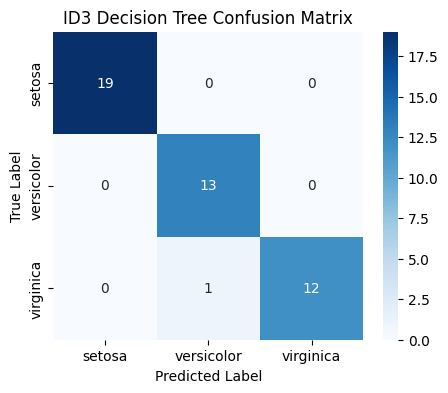


CART Decision Tree Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


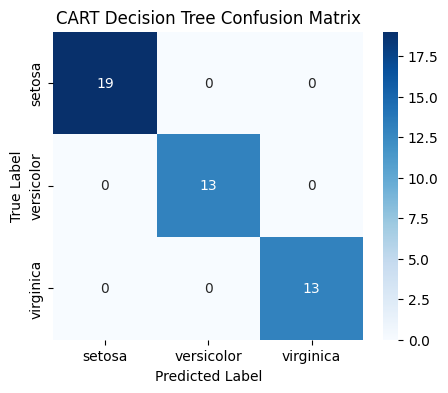

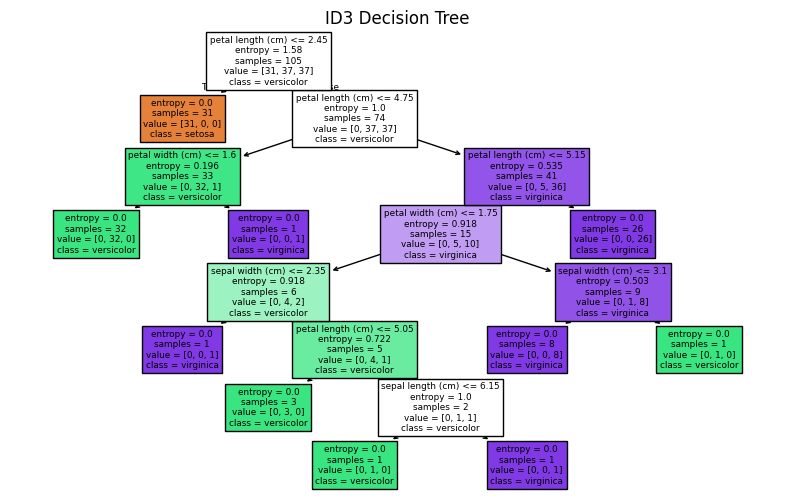

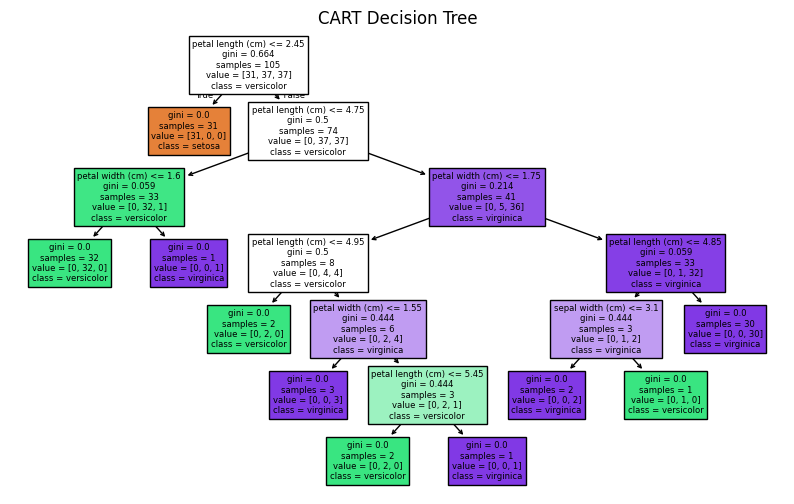

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)  # ID3 Algorithm
cart = DecisionTreeClassifier(criterion='gini', random_state=42)  # CART Algorithm
id3.fit(X_train, y_train)
cart.fit(X_train, y_train)
y_pred_id3 = id3.predict(X_test)
y_pred_cart = cart.predict(X_test)
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)

    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

evaluate_model(y_test, y_pred_id3, "ID3 Decision Tree")
evaluate_model(y_test, y_pred_cart, "CART Decision Tree")
plt.figure(figsize=(10, 6))
plot_tree(id3, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("ID3 Decision Tree")
plt.show()

plt.figure(figsize=(10, 6))
plot_tree(cart, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("CART Decision Tree")
plt.show()



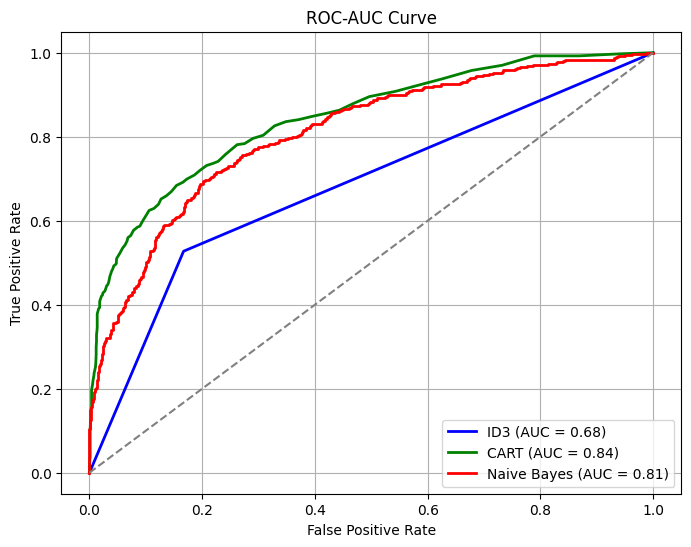

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc

df = pd.read_csv("Churn_Modelling.csv")
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])
df["Geography"] = label_encoder.fit_transform(df["Geography"])

X = df.drop("Exited", axis=1) 
y = df["Exited"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

id3 = DecisionTreeClassifier()  
cart = RandomForestClassifier()  
nb = GaussianNB() 
id3.fit(X_train, y_train)
cart.fit(X_train, y_train)
nb.fit(X_train, y_train)

y_pred_id3_prob = id3.predict_proba(X_test)[:, 1]
y_pred_cart_prob = cart.predict_proba(X_test)[:, 1]
y_pred_nb_prob = nb.predict_proba(X_test)[:, 1]

fpr_id3, tpr_id3, _ = roc_curve(y_test, y_pred_id3_prob)
roc_auc_id3 = auc(fpr_id3, tpr_id3)
fpr_cart, tpr_cart, _ = roc_curve(y_test, y_pred_cart_prob)
roc_auc_cart = auc(fpr_cart, tpr_cart)
fpr_nb, tpr_nb, _ = roc_curve(y_test, y_pred_nb_prob)
roc_auc_nb = auc(fpr_nb, tpr_nb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_id3, tpr_id3, color="blue", lw=2, label="ID3 (AUC = {:.2f})".format(roc_auc_id3))
plt.plot(fpr_cart, tpr_cart, color="green", lw=2, label="CART (AUC = {:.2f})".format(roc_auc_cart))
plt.plot(fpr_nb, tpr_nb, color="red", lw=2, label="Naive Bayes (AUC = {:.2f})".format(roc_auc_nb))
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Random line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve")
plt.legend(loc="lower right")
plt.grid()
plt.show()


In [4]:
# 2nd Question 


#Customer Segmentation using Clustering Algorithms
#Dataset:
#Use a combination of datasets to create a comprehensive customer profile. You can source datasets from:
#• Kaggle (e.g., customer transaction data, customer demographics)
#• UCI Machine Learning Repository (e.g., online retail data)
#Combine at least two datasets to enrich the feature set for each customer. Ensure that the combined dataset has a minimum of 10,000 data points.
#Objective:
#Perform customer segmentation to identify distinct groups of customers based on their purchasing behavior, demographics, and other relevant features.
#Instructions:
#Data Preparation:
#• Load and merge the datasets into a single Pandas DataFrame.
#• Handle missing values appropriately (e.g., imputation or removal).
#• Encode categorical variables using techniques like one-hot encoding or label encoding.
#• Scale the numerical features using StandardScaler or MinMaxScaler.
#Implement the following clustering algorithms:
#• K-Means
#• K-Medoids
#• Hierarchical Clustering
#For each algorithm:
#• Determine the optimal number of clusters using appropriate methods such as the elbow method, silhouette score3, or dendrograms.
#• Train the model on the preprocessed dataset using the determined optimal number of clusters.
#• Assign each data point to a cluster.
#• Visualize the clusters using dimensionality reduction techniques (e.g., PCA or t-SNE) for higher-dimensional data.
#• Evaluate the clustering performance using appropriate metrics such as silhouette score3.
#Comparative Analysis:
#Compare the performance of the three algorithms and visualize the results.


import pandas as pd
from sklearn.preprocessing import LabelEncoder

dataset1 = pd.read_csv('online_retail_II.csv')
dataset2 = pd.read_csv('customer_data.csv')

dataset1.columns = dataset1.columns.str.strip()
dataset2.columns = dataset2.columns.str.strip()

print("Dataset1 Columns:", dataset1.columns)
print("Dataset2 Columns:", dataset2.columns)

if 'CustomerID' in dataset1.columns and 'CustomerID' in dataset2.columns:
    merged_df = pd.merge(dataset1, dataset2, on='CustomerID', how='outer')
else:
    print('CustomerID column not found in one of the datasets.')
    exit()
    
merged_df[merged_df.select_dtypes(include=['float64', 'int64']).columns] = \
    merged_df.select_dtypes(include=['float64', 'int64']).fillna(0)

merged_df[merged_df.select_dtypes(include=['object']).columns] = \
    merged_df.select_dtypes(include=['object']).fillna('Unknown')
label_encoder = LabelEncoder()

if 'ProductInformation' in merged_df.columns:
    merged_df['ProductInformation'] = label_encoder.fit_transform(merged_df['ProductInformation'])

if 'Location' in merged_df.columns:
    merged_df['Location'] = label_encoder.fit_transform(merged_df['Location'])

if 'Country' in merged_df.columns:
    merged_df['Country'] = label_encoder.fit_transform(merged_df['Country'])
merged_df.to_csv('cleaned_data.csv', index=False)
print("Data merged and cleaned successfully. Rows:", len(merged_df))


Dataset1 Columns: Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'CustomerID', 'Country'],
      dtype='object')
Dataset2 Columns: Index(['CustomerID', 'OrderID', 'ProductInformation', 'TransactionAmount',
       'PurchaseDate', 'Location'],
      dtype='object')
Data merged and cleaned successfully. Rows: 542910


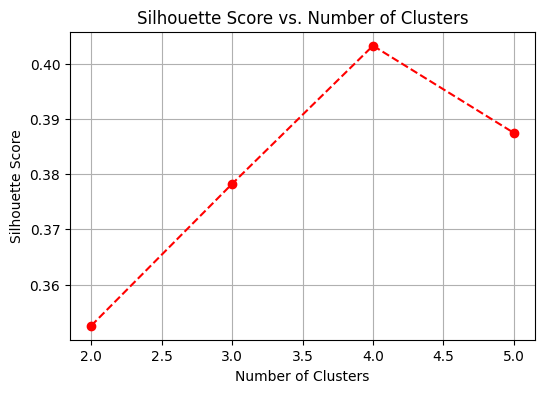

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate sample data
np.random.seed(42)
X = np.random.rand(10000, 2)  

# Find Silhouette Scores for different cluster numbers
silhouette_scores = []
cluster_range = range(2, 6)  # Testing clusters from 2 to 5

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    silhouette_scores.append(silhouette_score(X, labels))

# Plot Silhouette Score vs. Number of Clusters
plt.figure(figsize=(6, 4))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='r')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.grid(True)
plt.show()


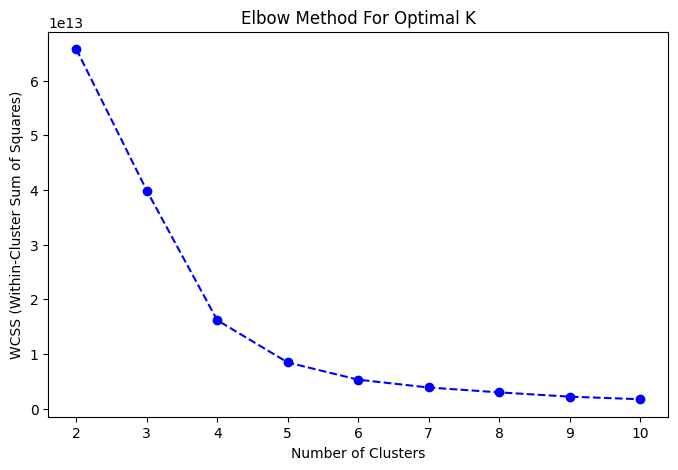

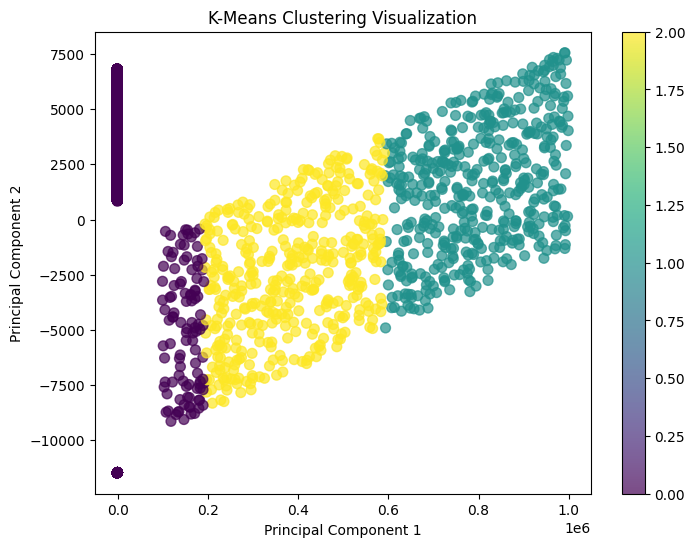

Silhouette Score for K-Means: 0.991
Clustered data saved successfully as 'clustered_data.csv'.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.utils import resample

# Load dataset
df = pd.read_csv('cleaned_data.csv')

# Select only numerical columns and drop missing values
X = df.select_dtypes(include=['float64', 'int64']).dropna()

# Finding Optimal K using Elbow Method
wcss = []
for i in range(2, 11):  # Changed range from (1,11) to (2,11)
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--', color='b')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.xticks(range(2, 11))
plt.show()

# Set Optimal Cluster Count
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

df['Cluster'] = y_kmeans

# PCA for Visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter)
plt.show()

# Resample while maintaining cluster proportions
X_sampled, y_sampled = resample(X, y_kmeans, n_samples=500, random_state=42, stratify=y_kmeans)

# Ensure silhouette score calculation is valid
if len(set(y_sampled)) > 1:
    silhouette_avg = silhouette_score(X_sampled, y_sampled)
    print(f'Silhouette Score for K-Means: {silhouette_avg:.3f}')
else:
    print("Silhouette Score cannot be computed as only one cluster is present in the resampled data.")

# Save clustered data
df.to_csv('clustered_data.csv', index=False)
print("Clustered data saved successfully as 'clustered_data.csv'.")


Silhouette Score: 0.38


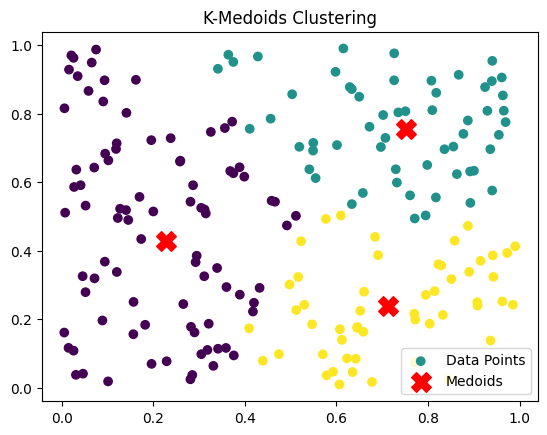

In [8]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

np.random.seed(42)
X = np.random.rand(200, 2) 

class KMedoids:
    def __init__(self, n_clusters, max_iters=10):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.medoids = None
        self.labels = None
    def fit(self, X):
        n_samples = X.shape[0]
        initial_medoid_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        self.medoids = X[initial_medoid_indices]

        for _ in range(self.max_iters):
            clusters = self._assign_clusters(X)
            new_medoids = self._compute_medoids(X, clusters)
            if np.array_equal(self.medoids, new_medoids):
                break
            self.medoids = new_medoids
        self.labels = self._assign_clusters(X)
    def _assign_clusters(self, X):
        distances = cdist(X, self.medoids, metric='euclidean')
        return np.argmin(distances, axis=1)

    def _compute_medoids(self, X, clusters):
        new_medoids = []
        for cluster_idx in range(self.n_clusters):
            cluster_points = X[clusters == cluster_idx]
            if len(cluster_points) > 0:
                distances = cdist(cluster_points, cluster_points, metric='euclidean')
                medoid_idx = np.argmin(np.sum(distances, axis=1))
                new_medoids.append(cluster_points[medoid_idx])
        return np.array(new_medoids)

X_sampled = X[:542000]  
kmedoids = KMedoids(n_clusters=3, max_iters=10)
kmedoids.fit(X_sampled)

score = silhouette_score(X_sampled, kmedoids.labels) 
print(f"Silhouette Score: {score:.2f}")

plt.scatter(X_sampled[:, 0], X_sampled[:, 1], c=kmedoids.labels, cmap='viridis', marker='o', label="Data Points")
plt.scatter(kmedoids.medoids[:, 0], kmedoids.medoids[:, 1], c='red', marker='X', s=200, label="Medoids")
plt.legend()
plt.title("K-Medoids Clustering")
plt.show()


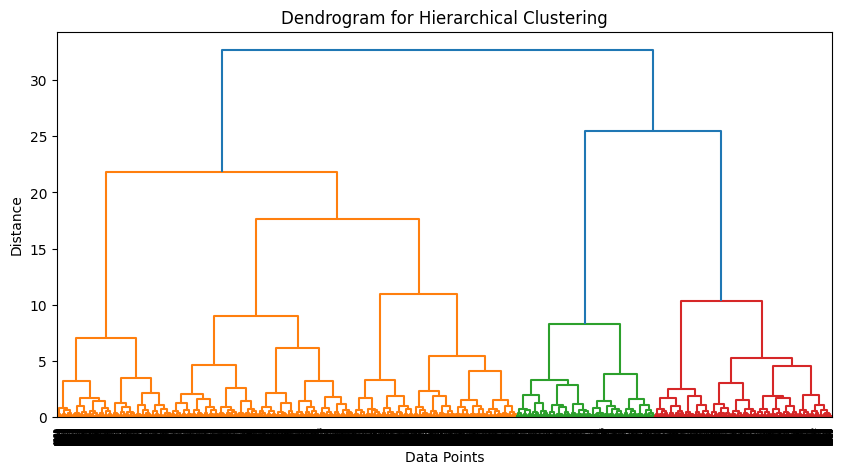

Silhouette Score: 0.30


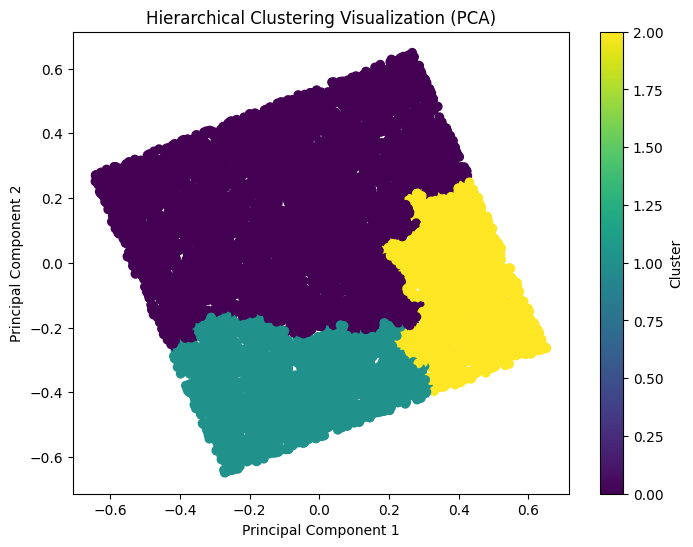

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

np.random.seed(42)
X = np.random.rand(10000, 2)  

linked = linkage(X, method='ward')  

plt.figure(figsize=(10, 5))
dendrogram(linked)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

optimal_clusters = 3  
hierarchical = AgglomerativeClustering(n_clusters=optimal_clusters, linkage='ward')
labels = hierarchical.fit_predict(X)  
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', marker='o', label="Clusters")
plt.title("Hierarchical Clustering Visualization (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()


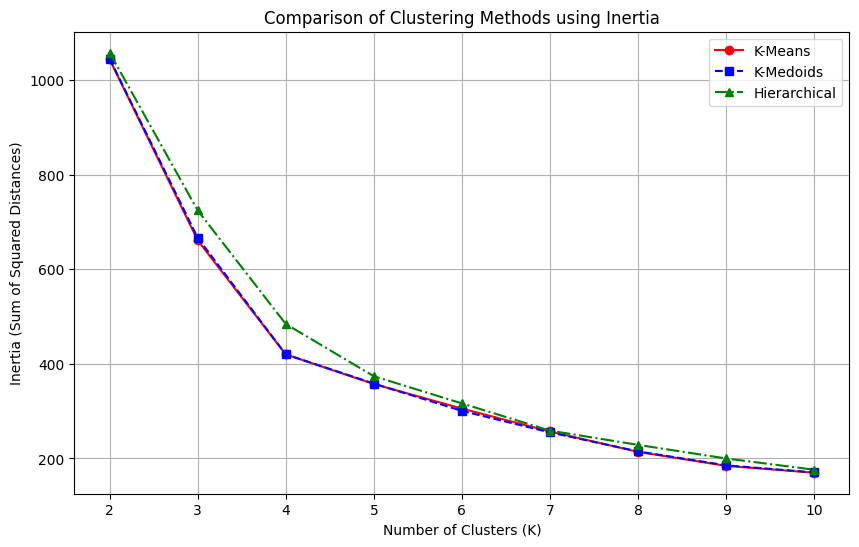

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

np.random.seed(42)
X = np.random.rand(10000, 2) 
def compute_inertia(X, labels, centers):
    return sum(np.min(cdist(X, centers), axis=1) ** 2)

def kmeans(X, k, max_iters=100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]   
    for _ in range(max_iters):
        labels = np.array([np.argmin([np.linalg.norm(x - c) for c in centroids]) for x in X])
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

def kmedoids(X, k, max_iters=100):
    medoids = X[np.random.choice(X.shape[0], k, replace=False)]   
    for _ in range(max_iters):
        labels = np.array([np.argmin([np.linalg.norm(x - m) for m in medoids]) for x in X])
        new_medoids = np.array([
            X[labels == j][np.argmin(np.sum(cdist(X[labels == j], X[labels == j]), axis=1))]
            for j in range(k)
        ])        
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids
    return labels, medoids

from scipy.cluster.hierarchy import linkage, fcluster
def hierarchical_clustering(X, k):
    linkage_matrix = linkage(X, method='ward')
    labels = fcluster(linkage_matrix, k, criterion='maxclust')
    return labels

k_values = range(2, 11)
kmeans_inertia = []
kmedoids_inertia = []
hierarchical_inertia = []

for k in k_values:
    kmeans_labels, kmeans_centers = kmeans(X, k)
    kmeans_inertia.append(compute_inertia(X, kmeans_labels, kmeans_centers))
    
    kmedoids_labels, kmedoids_medoids = kmedoids(X, k)
    kmedoids_inertia.append(compute_inertia(X, kmedoids_labels, kmedoids_medoids))
    
    hierarchical_labels = hierarchical_clustering(X, k)
    hierarchical_centers = np.array([X[hierarchical_labels == j].mean(axis=0) for j in range(1, k + 1)])
    hierarchical_inertia.append(compute_inertia(X, hierarchical_labels, hierarchical_centers))

plt.figure(figsize=(10, 6))

plt.plot(k_values, kmeans_inertia, marker='o', linestyle='-', color='red', label='K-Means')
plt.plot(k_values, kmedoids_inertia, marker='s', linestyle='--', color='blue', label='K-Medoids')
plt.plot(k_values, hierarchical_inertia, marker='^', linestyle='-.', color='green', label='Hierarchical')

plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Sum of Squared Distances)")
plt.title("Comparison of Clustering Methods using Inertia")
plt.legend()
plt.grid(True)
plt.show()

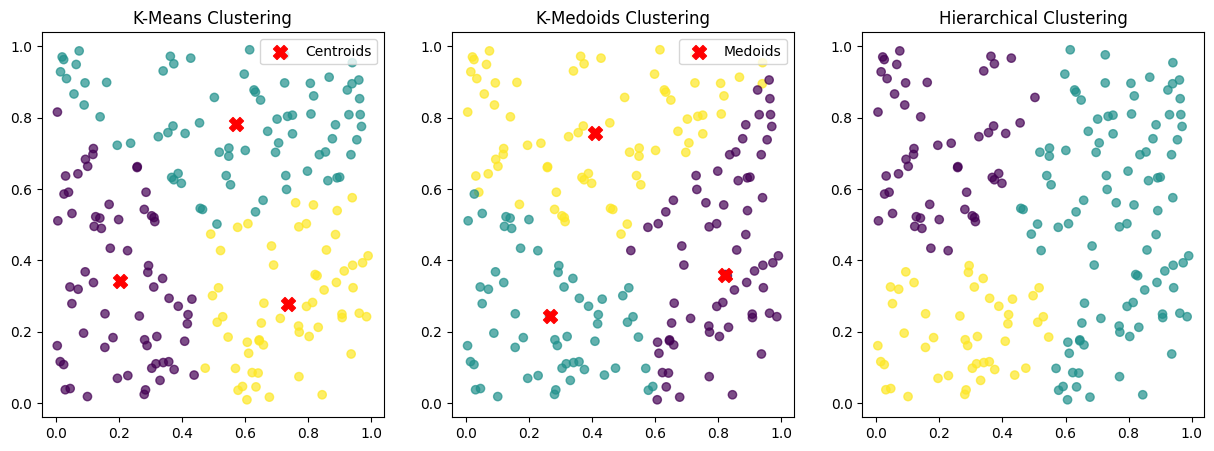

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# ================== 📌 STEP 1: GENERATE SAMPLE DATA ==================
np.random.seed(42)
X = np.random.rand(200, 2)  # 200 random 2D points

# ================== 📌 STEP 2: IMPLEMENT K-MEANS FROM SCRATCH ==================
def euclidean_distance(a, b):
    """Compute Euclidean distance between two points."""
    return np.sqrt(np.sum((a - b) ** 2))

def kmeans(X, k, max_iters=100):
    """K-Means Clustering from Scratch."""
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        labels = np.array([np.argmin([euclidean_distance(x, c) for c in centroids]) for x in X])
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])

        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids

    return labels, centroids

kmeans_labels, kmeans_centroids = kmeans(X, k=3)

# ================== 📌 STEP 3: IMPLEMENT K-MEDOIDS FROM SCRATCH ==================
def kmedoids(X, k, max_iters=100):
    """K-Medoids Clustering from Scratch."""
    medoids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        labels = np.array([np.argmin([euclidean_distance(x, m) for m in medoids]) for x in X])
        new_medoids = np.array([
            X[labels == j][np.argmin(np.sum(cdist(X[labels == j], X[labels == j]), axis=1))]
            for j in range(k)
        ])
        
        if np.all(medoids == new_medoids):
            break
        medoids = new_medoids

    return labels, medoids

kmedoids_labels, kmedoids_medoids = kmedoids(X, k=3)

# ================== 📌 STEP 4: IMPLEMENT HIERARCHICAL CLUSTERING FROM SCRATCH ==================
def hierarchical_clustering(X, k):
    """Hierarchical Clustering using Agglomerative Clustering."""
    clusters = [[x] for x in X]

    while len(clusters) > k:
        min_dist = float('inf')
        to_merge = None

        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                dist = np.mean([euclidean_distance(p1, p2) for p1 in clusters[i] for p2 in clusters[j]])
                if dist < min_dist:
                    min_dist = dist
                    to_merge = (i, j)

        clusters[to_merge[0]] += clusters[to_merge[1]]
        del clusters[to_merge[1]]

    labels = np.zeros(len(X))
    for cluster_id, cluster in enumerate(clusters):
        for point in cluster:
            labels[np.all(X == point, axis=1)] = cluster_id

    return labels

hierarchical_labels = hierarchical_clustering(X, k=3)

# ================== 📌 STEP 5: VISUALIZE THE COMPARISON ==================
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# K-Means Plot
axs[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', marker='o', alpha=0.7)
axs[0].scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], c='red', marker='X', s=100, label='Centroids')
axs[0].set_title("K-Means Clustering")
axs[0].legend()

# K-Medoids Plot
axs[1].scatter(X[:, 0], X[:, 1], c=kmedoids_labels, cmap='viridis', marker='o', alpha=0.7)
axs[1].scatter(kmedoids_medoids[:, 0], kmedoids_medoids[:, 1], c='red', marker='X', s=100, label='Medoids')
axs[1].set_title("K-Medoids Clustering")
axs[1].legend()

# Hierarchical Clustering Plot
axs[2].scatter(X[:, 0], X[:, 1], c=hierarchical_labels, cmap='viridis', marker='o', alpha=0.7)
axs[2].set_title("Hierarchical Clustering")

plt.show()
